In [1]:
import timetable_scheduler.solution
from timetable_scheduler import create_dataset, timing, process_image_manager
from timetable_scheduler.matrix_operators import matrix_cut_and_paste_translation, matrix_inner_translation, matrix_transposition, MatrixOperator


In [2]:
import numpy as np

@timing
def operator_time_measurement(matrix_operator: MatrixOperator, test_matrix: np.ndarray, iterations: int):
    for i in range(iterations):
        matrix_operator(test_matrix)

### Time complexity test setup
For every matrix operator perform time complexity tests for k different availability probability levels.
For every availability probability level perform m tests with n iterations each.

Let k = 3, m = 10, n = 1000.
My dataset of choice is the 5th term.

In [3]:
# k different availability probability levels
probability_levels = [0.5, 0.7, 0.9]
# m tests and n iterations
m = 10
n = 1000
dataset = 5

matrix_operators = [matrix_cut_and_paste_translation, matrix_inner_translation, matrix_transposition]
operator_labels = ['matrix_cut_and_paste_translation', 'matrix_inner_translation', 'matrix_transposition']

test_results = {operator_label: [] for operator_label in operator_labels}

for matrix_operator, operator_label in zip(matrix_operators, operator_labels):
    for probability_level in probability_levels:
        # test matrix setup
        create_dataset(term_id=dataset, room_p=probability_level, lecturer_p=probability_level)
        process_image_manager.reset_process_image()
        test_solution = timetable_scheduler.solution.Solution()
        while not test_solution.check_acceptability():
            process_image_manager.reset_process_image()
            test_solution = timetable_scheduler.solution.Solution()
        test_matrix = test_solution.matrix
        # perform m tests with n iterations
        results = []
        for test in range(m):
            _, total_time = operator_time_measurement(matrix_operator, test_matrix, n)
            # save the average time for each run
            results.append(total_time / n)
        test_results[operator_label] += results


### Data Analysis

Studied properties:
* matrix operator runtimes
* the influence of matrix operators on the cost function
* the sequence of matrix operators



#### Matrix operator runtimes

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

operator_column = []
average_time_column = []
for operator_label, values in test_results.items():
    operator_column += [operator_label] * len(values)
    average_time_column += list(values)

df = pd.DataFrame(np.array([operator_column, average_time_column]).T, columns=['matrix operator', 'runtime'])
# get time in milliseconds
df['runtime'] = df['runtime'].astype('float') * 10e3
df.head()

,matrix operator,runtime
0,matrix_cut_and_paste_translation,13.700011
1,matrix_cut_and_paste_translation,14.040017
2,matrix_cut_and_paste_translation,13.789971
3,matrix_cut_and_paste_translation,13.889997
4,matrix_cut_and_paste_translation,13.660009


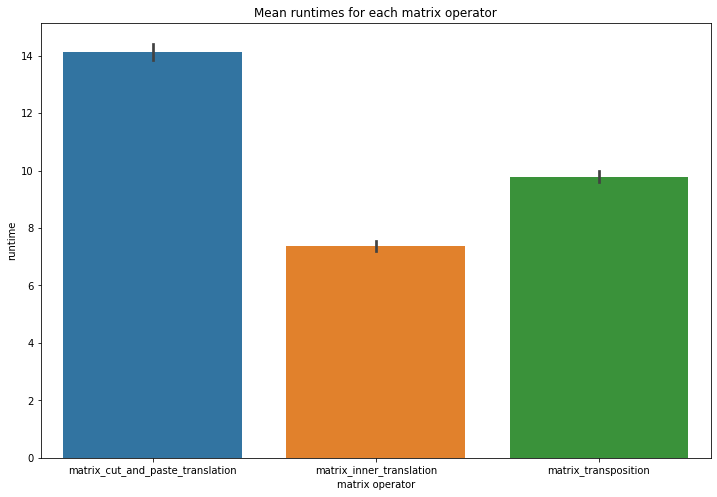

In [5]:
plt.figure(figsize=(12, 8))
sns.barplot(x='matrix operator', y='runtime', data=df)
plt.title('Mean runtimes for each matrix operator')
plt.show()

#### The influence of matrix operators on the cost function



In [6]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]



operator_quality_measurements = []
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule_test.json', 'r') as file:
        data = json.load(file)
        for parameters, results in data.items():
            for result in results:
                operator_quality_measurements += result['operator_quality_measurement']



In [7]:
operator_acceptability_rate = []
operator_f_cost_improvements = []
operator_f_cost_aggravations = []
operator_f_cost_constants = []
operator_names = []

f_cost_names = []
f_cost_changes = []

for measurement in operator_quality_measurements:
    for operator_call in measurement["operator_calls"]:
        f_cost_changes.append(operator_call['f_cost_change'])
        f_cost_names.append(measurement['operator_name'])
    operator_names.append(measurement['operator_name'])
    operator_acceptability_rate.append(measurement['n_acceptable_solutions']/measurement['n_calls'])
    operator_f_cost_improvements.append(measurement['f_cost_improvements'])
    operator_f_cost_aggravations.append(measurement['f_cost_aggravations'])
    operator_f_cost_constants.append(measurement['f_cost_constants'])

In [8]:
import pandas as pd
import numpy as np
col_names = ['operator', 'acceptability_rate', 'operator_f_cost_improvements', 'operator_f_cost_aggravations', 'operator_f_cost_constants']
df = pd.DataFrame(np.array([operator_names, operator_acceptability_rate, operator_f_cost_improvements, operator_f_cost_aggravations, operator_f_cost_constants]).T, columns=col_names)

In [9]:
df['acceptability_rate'] = df['acceptability_rate'].astype('float')
df['operator_f_cost_improvements'] = df['operator_f_cost_improvements'].astype('int')
df['operator_f_cost_aggravations'] = df['operator_f_cost_aggravations'].astype('int')
df['operator_f_cost_constants'] = df['operator_f_cost_constants'].astype('int')



df.head()


,operator,acceptability_rate,operator_f_cost_improvements,operator_f_cost_aggravations,operator_f_cost_constants
0,matrix_transposition,0.765061,0,2614,1691
1,matrix_inner_translation,0.734461,2,4243,9
2,matrix_cut_and_paste_translation,0.304070,758,3156,277
3,matrix_transposition,0.765061,0,2614,1691
4,matrix_inner_translation,0.734461,2,4243,9


<AxesSubplot:xlabel='operator', ylabel='acceptability_rate'>

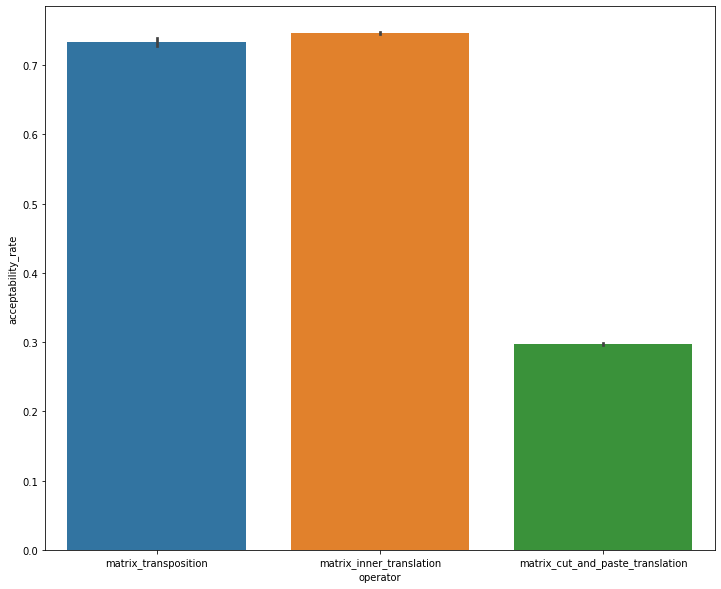

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
sns.barplot(x='operator', y='acceptability_rate', data=df)

<AxesSubplot:xlabel='operator', ylabel='acceptability_rate'>

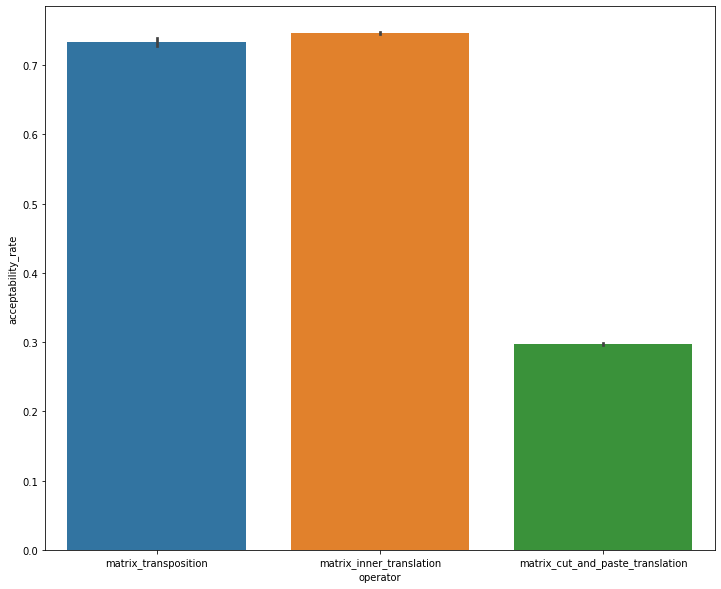

In [11]:
plt.figure(figsize=(12, 10))
sns.barplot(x='operator', y='acceptability_rate', data=df)